**Guojing Wu** | UNI: gw2383 | *2019-12-19*
**Xiaoke Zou** | UNI: xz2809 | *2019-12-19*

# E6893 Big Data Final Project

## Setup

Download the IMBD data from Kaggle: https://www.kaggle.com/rounakbanik/the-movies-dataset#movies_metadata.csv, and load to bucket.

## Save into bigquery

* Download data in .csv form, then transform them into nested .json format

* write schema.json

* load into BigQuery

## EDA

1. what's the rating for movie collections over time?

2. what's the rating trend for each genres over time?

### collections

In [ ]:
from google.cloud import bigquery
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
matplotlib.style.use('ggplot')
client = bigquery.Client()

Text(0,0.5,'average rate')

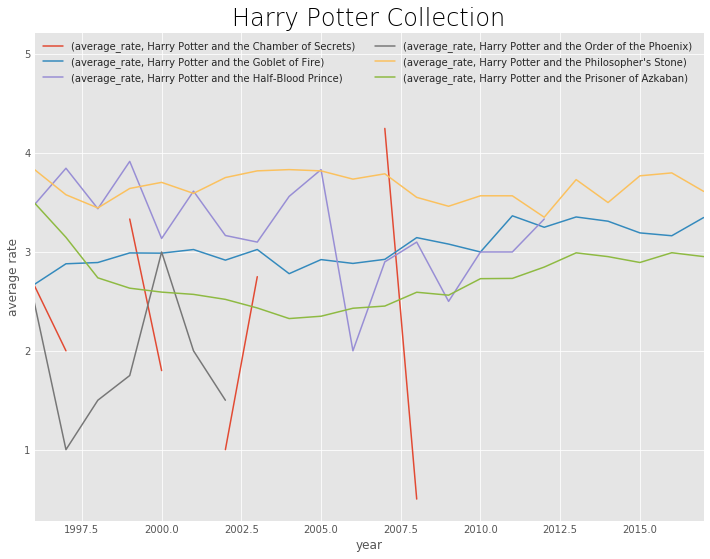

In [45]:
sql = """
SELECT m.title, m.release_date, EXTRACT(YEAR FROM r.timestamp) AS year, AVG(r.rating) AS average_rate
FROM `bigdata_final.movies` AS m
  RIGHT JOIN `bigdata_final.ratings` AS r
  ON m.id = r.movieId 
WHERE belongs_to_collection.name LIKE "%Harry Potter%"
GROUP BY m.title, m.release_date, year
ORDER BY m.release_date, year
"""
df_HP = client.query(sql).to_dataframe()

df_HP.groupby(['year', 'title']).sum().unstack().plot(figsize=(12,9))
plt.legend(loc=2, ncol=2)
plt.title("Harry Potter Collection", loc='center', fontsize=24, fontweight=0, color='black')
plt.xlabel("year")
plt.ylabel("average rate")

Text(0,0.5,'average rate')

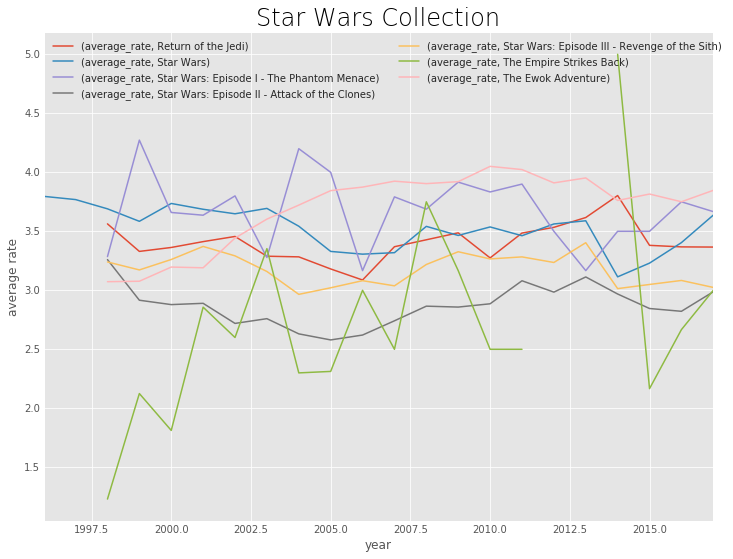

In [43]:
sql = """
SELECT m.title, m.release_date, EXTRACT(YEAR FROM r.timestamp) AS year, AVG(r.rating) AS average_rate
FROM `bigdata_final.movies` AS m
  RIGHT JOIN `bigdata_final.ratings` AS r
  ON m.id = r.movieId 
WHERE belongs_to_collection.name LIKE "%Star Wars%"
GROUP BY m.title, m.release_date, year
ORDER BY m.release_date, year
"""
df_HP = client.query(sql).to_dataframe()

df_HP.groupby(['year', 'title']).sum().unstack().plot(figsize=(12,9))
plt.legend(loc=2, ncol=2)
plt.title("Star Wars Collection", loc='center', fontsize=24, fontweight=0, color='black')
plt.xlabel("year")
plt.ylabel("average rate")

Text(0,0.5,'average rate')

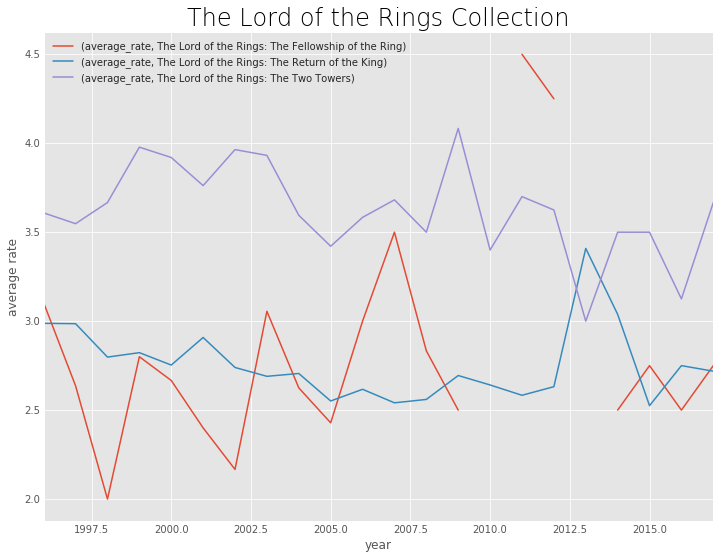

In [48]:
sql = """
SELECT m.title, m.release_date, EXTRACT(YEAR FROM r.timestamp) AS year, AVG(r.rating) AS average_rate 
FROM `bigdata_final.movies` AS m
  LEFT JOIN `bigdata_final.ratings` AS r
  ON m.id = r.movieId 
WHERE (belongs_to_collection.name LIKE '%Hobbit%'
  OR belongs_to_collection.name LIKE '%Lord of the Ring%')
  AND release_date > '2000-01-01' 
  AND release_date < '2020-01-01'
GROUP BY m.title, m.release_date, year
ORDER by release_date, year
"""
df_HP = client.query(sql).to_dataframe()

df_HP.groupby(['year', 'title']).sum().unstack().plot(figsize=(12,9))
plt.legend(loc=2, ncol=1)
plt.title("The Lord of the Rings Collection", loc='center', fontsize=24, fontweight=0, color='black')
plt.xlabel("year")
plt.ylabel("average rate")

Text(0,0.5,'average rate')

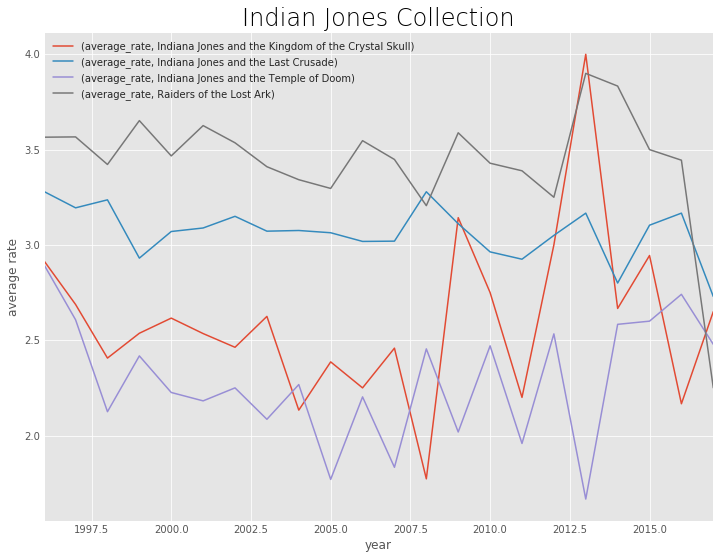

In [49]:
sql = """
SELECT m.title, m.release_date, EXTRACT(YEAR FROM r.timestamp) AS year, AVG(r.rating) AS average_rate 
FROM `bigdata_final.movies` AS m
  LEFT JOIN `bigdata_final.ratings` AS r
  ON m.id = r.movieId 
WHERE belongs_to_collection.name LIKE '%Indiana Jones%'
GROUP BY m.title, m.release_date, year
ORDER by release_date, year
"""
df_HP = client.query(sql).to_dataframe()

df_HP.groupby(['year', 'title']).sum().unstack().plot(figsize=(12,9))
plt.legend(loc=2, ncol=1)
plt.title("Indian Jones Collection", loc='center', fontsize=24, fontweight=0, color='black')
plt.xlabel("year")
plt.ylabel("average rate")

Text(0,0.5,'average rate')

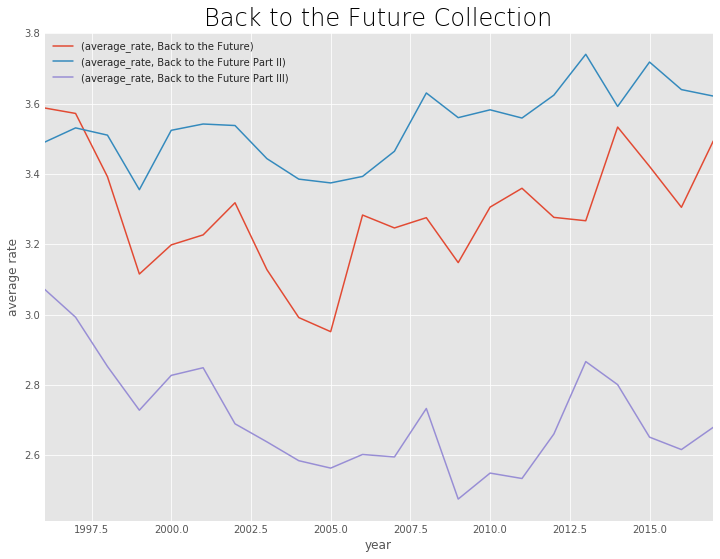

In [50]:
sql = """
SELECT m.title, m.release_date, EXTRACT(YEAR FROM r.timestamp) AS year, AVG(r.rating) AS average_rate 
FROM `bigdata_final.movies` AS m
  LEFT JOIN `bigdata_final.ratings` AS r
  ON m.id = r.movieId 
WHERE belongs_to_collection.name LIKE '%Back to the Future%'
GROUP BY m.title, m.release_date, year
ORDER by release_date, year
"""
df_HP = client.query(sql).to_dataframe()

df_HP.groupby(['year', 'title']).sum().unstack().plot(figsize=(12,9))
plt.legend(loc=2, ncol=1)
plt.title("Back to the Future Collection", loc='center', fontsize=24, fontweight=0, color='black')
plt.xlabel("year")
plt.ylabel("average rate")

Text(0,0.5,'average rate')

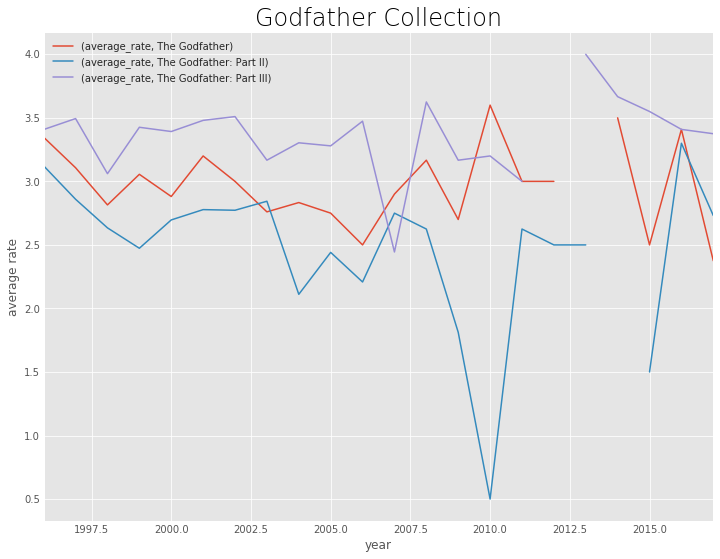

In [51]:
sql = """
SELECT m.title, m.release_date, EXTRACT(YEAR FROM r.timestamp) AS year, AVG(r.rating) AS average_rate 
FROM `bigdata_final.movies` AS m
  LEFT JOIN `bigdata_final.ratings` AS r
  ON m.id = r.movieId 
WHERE belongs_to_collection.name LIKE '%Godfather%'
GROUP BY m.title, m.release_date, year
ORDER by release_date, year
"""
df_HP = client.query(sql).to_dataframe()

df_HP.groupby(['year', 'title']).sum().unstack().plot(figsize=(12,9))
plt.legend(loc=2, ncol=1)
plt.title("Godfather Collection", loc='center', fontsize=24, fontweight=0, color='black')
plt.xlabel("year")
plt.ylabel("average rate")

### genres

we have 20 different types of genres:

In [53]:
sql = """
SELECT COUNT(DISTINCT g.name) AS count
FROM `bigdata_final.movies`, UNNEST(`bigdata_final.movies`.genres) AS g
"""
client.query(sql).to_dataframe()

,count
0,20


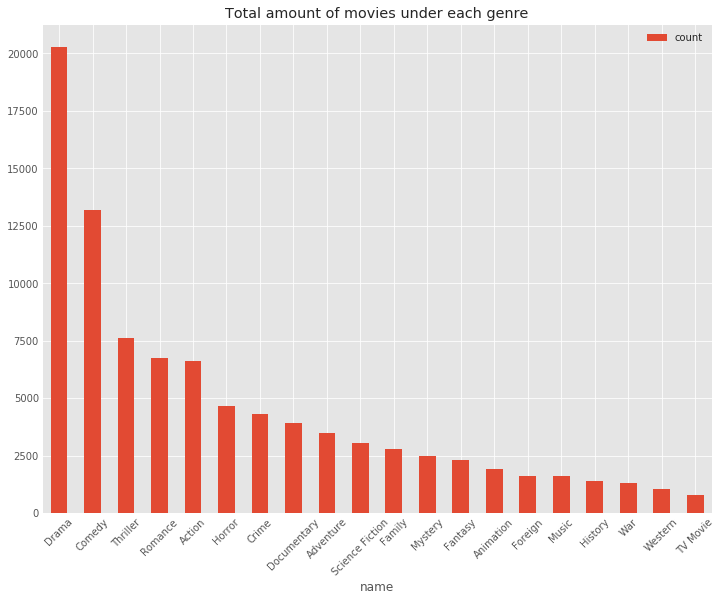

In [73]:
sql = """
SELECT g.name, COUNT(m.id) AS count
FROM `bigdata_final.movies` AS m, UNNEST(m.genres) AS g
GROUP BY g.name
ORDER BY count DESC
"""
df_genres = client.query(sql).to_dataframe()

df_genres.plot(kind='bar', x='name', y='count', rot=45, figsize=(12,9),
              title='Total amount of movies under each genre')

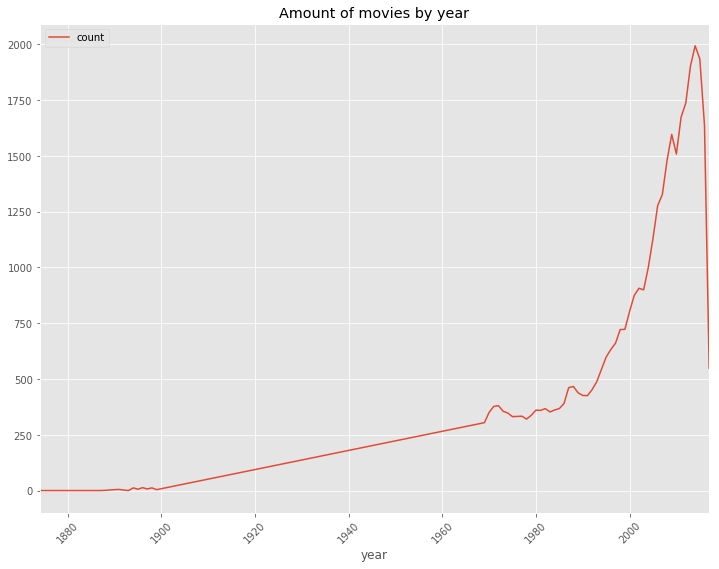

In [5]:
sql = """
SELECT EXTRACT(YEAR from release_date) AS year, COUNT(title) AS count
FROM `bigdata_final.movies` 
WHERE EXTRACT(YEAR from release_date) IS NOT NULL 
  AND release_date < '2018-01-01'
GROUP BY year
ORDER BY year 
"""
df_CountByYear = client.query(sql).to_dataframe()
df_CountByYear.plot(kind='line', x='year', y='count', rot=45, figsize=(12,9),
              title='Amount of movies by year')

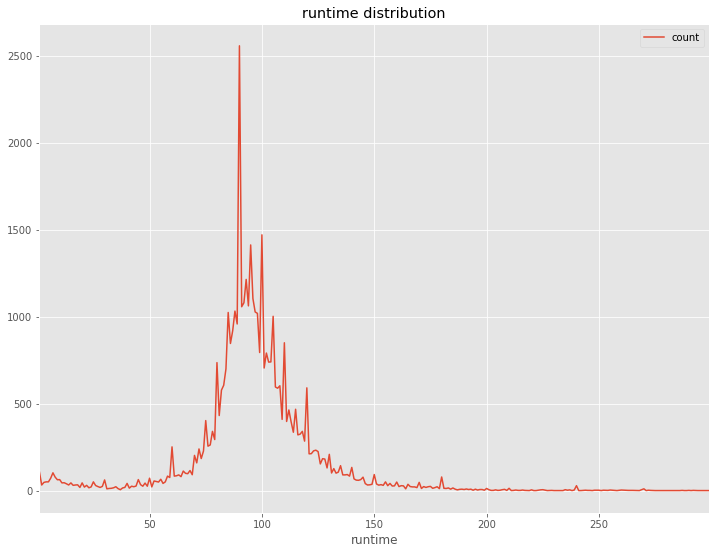

In [11]:
sql = """
SELECT runtime, COUNT(id) AS count
FROM `bigdata_final.movies` 
WHERE runtime IS NOT NULL
  AND runtime > 0
  AND runtime < 300
GROUP BY runtime
ORDER BY runtime 
"""
df_CountByYear = client.query(sql).to_dataframe()
df_CountByYear.plot(kind='line', x='runtime', y='count', figsize=(12,9),
              title='runtime distribution')

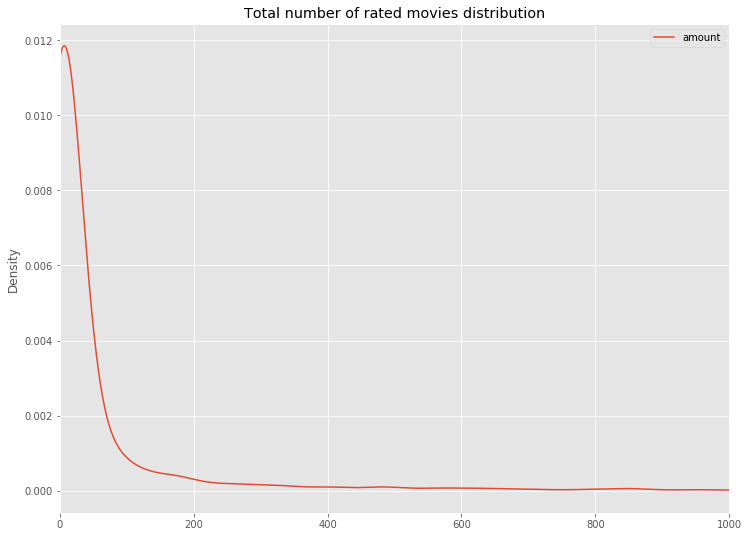

In [23]:
sql = """
SELECT num_watched, COUNT(num_watched) AS amount
FROM (
  SELECT userId, COUNT(movieId) as num_watched
  FROM `bigdata_final.ratings` 
  GROUP BY userId
  ORDER BY num_watched DESC) AS c
GROUP BY num_watched
HAVING COUNT(num_watched) < 1000
ORDER BY num_watched
"""
df_CountByYear = client.query(sql).to_dataframe()
df_CountByYear.plot(kind='kde', x='num_watched', y='amount', figsize=(12,9),
              xlim=(0, 1000), title='Total number of rated movies distribution')

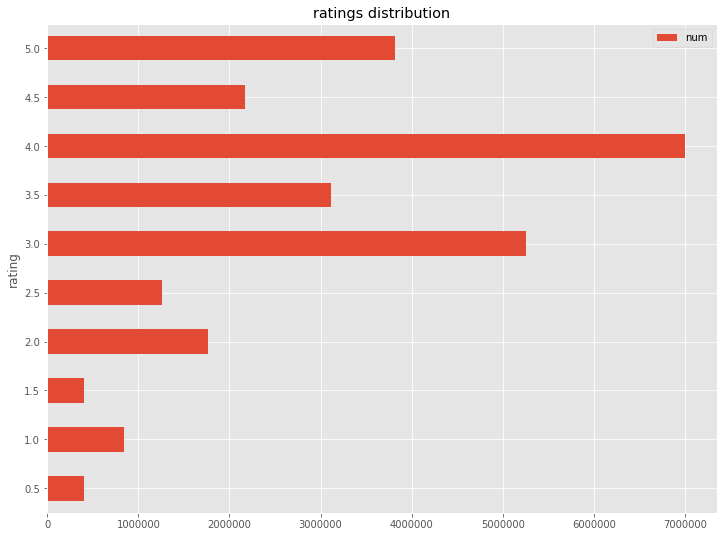

In [44]:
sql = """
SELECT rating, COUNT(rating) AS num
FROM `bigdata_final.ratings` 
GROUP BY rating 
ORDER BY rating
"""
df_CountByYear = client.query(sql).to_dataframe()
df_CountByYear.plot(kind='barh', x='rating', y='num', figsize=(12,9),
              title='ratings distribution')

Text(0.5,1.02,'Rating trend for each genre over last 20 years')

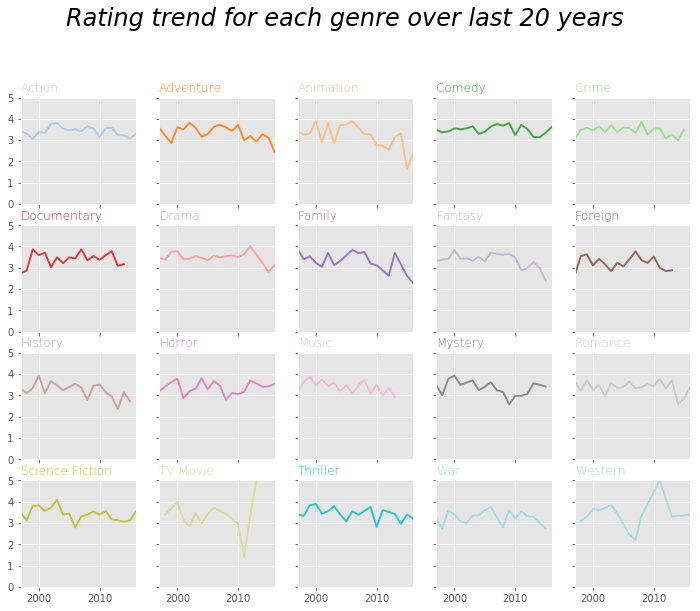

In [63]:
sql = """
SELECT genres.name AS genre, EXTRACT(YEAR from m.release_date) AS year, AVG(r.rating) AS average_rate
FROM `bigdata_final.movies` AS m
  LEFT JOIN `bigdata_final.ratings` AS r
  ON m.id = r.movieId, m.genres
WHERE m.release_date < '2017-01-01'
  AND m.release_date > '1997-01-01'
GROUP BY genres.name, year
HAVING AVG(r.rating) IS NOT NULL
ORDER BY genres.name, year
"""
df_GenreByYear = client.query(sql).to_dataframe()
genreList = df_GenreByYear.genre.drop_duplicates()
num = 0
palette = plt.get_cmap('tab20')

plt.figure(figsize=(12,9))
for i in genreList:
    num += 1
    tmp = df_GenreByYear[df_GenreByYear.genre == i]
    plt.subplot(4,5, num)
    plt.plot(tmp.year, tmp.average_rate, marker='', color=palette(num), linewidth=1.9, alpha=0.9, label=i)
    
    plt.xlim(1997, 2016)
    plt.ylim(0, 5)
    
    if num in range(16) :
        plt.tick_params(labelbottom='off')
    if num not in [1,6,11,16] :
        plt.tick_params(labelleft='off')
    
    plt.title(i, loc='left', fontsize=12, fontweight=0, color=palette(num))


# general title
plt.suptitle("Rating trend for each genre over last 20 years", 
             fontsize=24, fontweight=0, color='black', style='italic', y=1.02)

## clustering

1. First extract the info for each movie in the form [id, 'keywords', 'cast', 'director', 'genre']

2. Then use word2vec to get the feature vector

3. use K-means for clustering and save the result to bigquery

In [1]:
from pyspark import SparkConf, SparkContext
import sys, random, pyspark, requests, subprocess
from pyspark.ml.feature import Tokenizer, RegexTokenizer, Word2Vec
from pyspark.ml.clustering import KMeans, KMeansModel
from pyspark.ml.fpm import FPGrowth
from pyspark.ml import Pipeline
# %load_ext google.cloud.bigquery
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate, train_test_split
matplotlib.style.use('ggplot')

random.seed(100)
centroidNum = 20

# client = bigquery.Client()

In [20]:
def get_lists(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        return names

    #Return empty list in case of missing/malformed data
    return []

def get_lists_crew(x):
    if isinstance(x, list):
        names = []
        for i in x:
            if i['job'] == 'Director':
                names.append(i['name'])
        return names

    #Return empty list in case of missing/malformed data
    return []

def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

sql = """
SELECT m.id, m.genres, c.cast, c.crew, k.keywords
FROM `bigdata_final.movies` AS m
  INNER JOIN `bigdata_final.credits` AS c
  on m.id = c.id
  INNER JOIN `bigdata_final.keywords` AS k
  on m.id = k.id
"""
df_category = spark.createDataFrame(client.query(sql).to_dataframe())

df_category['keywords'] = df_category['keywords'].apply(get_lists).apply(clean_data)
df_category['cast'] = df_category['cast'].apply(get_lists).apply(clean_data)
df_category['genres'] = df_category['genres'].apply(get_lists).apply(clean_data)
df_category['crew'] = df_category['crew'].apply(get_lists_crew).apply(clean_data)

# paste them together
def create_soup(x):
    return ' '.join(x['keywords']) \
            + ' ' + ' '.join(x['cast']) \
            + ' ' + ' '.join(x['crew']) \
            + ' ' + ' '.join(x['genres'])

df_category['soup'] = df_category.apply(create_soup, axis=1)
df_category = spark.createDataFrame(df_category)

,id,genres,cast,crew,keywords
0,36107,"[animation, sciencefiction]",[],[markosborne],"[capitalism, inventor, dystopia, stopmotion, s..."
1,26851,"[documentary, history]",[],"[jayneloader, kevinrafferty, piercerafferty]","[atomicbomb, propaganda]"
2,24348,"[documentary, drama, music]",[],[godfreyreggio],[independentfilm]
3,21925,"[documentary, drama, music, thriller]",[],[godfreyreggio],[independentfilm]
4,47684,"[documentary, drama]",[],[robertj.flaherty],[sharkfishers]


In [31]:
# tokenizer
regexTokenizer = RegexTokenizer(inputCol="soup", outputCol="words", pattern="[^A-Za-z]+", toLowercase=True)

# word2vec
word2Vec = Word2Vec(vectorSize=100, minCount=0, inputCol="words", outputCol="features")

# K-means
kmeans = KMeans() \
          .setK(centroidNum) \
          .setFeaturesCol("features")\
          .setPredictionCol("cluster")

pipeline = Pipeline(stages=[regexTokenizer, word2Vec, kmeans])
w2v_model = pipeline.fit(df_category)
df_split = w2v_model.transform(df_category)

# check total number of movie for each cluster
df_split.groupBy('cluster').count().select('cluster', pyspark.sql.functions.col('count').alias('n')).show()

+-------+----+
|cluster|   n|
+-------+----+
|     12|2187|
|      1|6953|
|     13|4114|
|      6|2775|
|     16| 955|
|      3| 492|
|      5|4878|
|     19|  51|
|     15|3365|
|      9| 316|
|     17| 168|
|      4|3277|
|      8|5375|
|      7| 203|
|     10| 103|
|     11|1768|
|     14|1390|
|      2|1285|
|      0|4118|
|     18|2855|
+-------+----+



In [ ]:
# save the temporary file to bucket
df_split.select(["id", "cluster"]).write.save('gs://big_data_hw/final/split', format="json", mode="overwrite")

# load to bigquery
files = 'gs://big_data_hw/final/split' + '/part-*'
subprocess.check_call(
    'bq load --source_format NEWLINE_DELIMITED_JSON '
    '--replace '
    '--autodetect '
    '{dataset}.{table} {files}'.format(
        dataset='bigdata_final', table='splits', files=files
    ).split())
output_path = sc._jvm.org.apache.hadoop.fs.Path('gs://big_data_hw/final/split')
output_path.getFileSystem(sc._jsc.hadoopConfiguration()).delete(output_path, True)

## Association Rule

for each cluster, build its own association rule model

In [103]:
z = {"a":[1],
    "b":[2,3],
    "c":[4,5,6]}

z.items()

dict_items([('a', [1]), ('b', [2, 3]), ('c', [4, 5, 6])])

In [ ]:
def get_cooccur(sc, df):
    hashmap = {}
    for i in range(df.shape[0]):
        if df.iloc[i,0] in hashmap:
            hashmap[df.iloc[i,0]].append(df.iloc[i,1])
        else:
            hashmap[df.iloc[i,0]] = [df.iloc[i,1]]
    
    return pd.DataFrame({"items":list(hashmap.values())})


sql = """
SELECT r.userId as user, r.movieId AS movie, r.rating as rates
FROM `bigdata_final.ratings` AS r 
  INNER JOIN `bigdata_final.splits` AS s
  ON r.movieId = s.id 
WHERE r.rating IS NOT NULL
  AND s.cluster = """ + str(0)
df_rating = client.query(sql).to_dataframe()

In [98]:
tmp = get_cooccur(df_rating)
tmp.head()

,items
0,"[81, 218, 85, 280, 6, 832, 1090, 329, 1408, 64..."
1,"[8922, 2655, 77449, 1924, 26643, 174, 27793, 2..."
2,"[146, 940, 2043, 2089, 837, 2095, 558, 2099, 1..."
3,"[89904, 69526, 3699, 94752, 2118, 26631, 74545..."
4,"[89, 3591, 3699, 1091, 2787, 482, 1635, 152, 5..."


In [ ]:
df_AR = spark.createDataFrame(tmp, "items: list")
fp = FPGrowth(minSupport=0.2, minConfidence=0.7)
fp_model = fp.fit(df_AR)

In [ ]:
new_data = spark.createDataFrame([(["2212", "8011"], )], ["items"])
sorted(fp_model.transform(new_data).first().prediction)

In [25]:
df = spark.createDataFrame([
    (0, [158455, 279006, 239091, 166253, 147871, 42170, 84450, 15809]),
    (1, [42170, 84450, 15809, 37126, 344476, 2760, 16759]),
    (2, [2760, 16759, 9366, 6110, 60534, 6016, 9650, 165904, 10237, 1248, 210047, 331190, 316654, 408626]),
    (3, [331190, 316654, 408626, 23538, 413052, 17200, 33927]),
    (4, [23538, 413052, 17200, 33927, 37181, 156643, 83, 174344]),
    (5, [165904, 10237, 1248, 210047, 331190, 316654, 408626, 23538, 413052, 17200, 33927, 37181, 156643, 83, 174344, 36055, 32671, 38199, 252164, 15664, 171581, 37571, 185640, 173793, 92011, 59404, 59290, 69569, 32229]),
    (6, [59404, 59290, 69569, 32229, 15809, 37126, 344476, 2760, 16759, 9366, 6110, 60534, 6016, 279006, 210047, 331190]),
    (7, [156643, 83, 174344, 36055, 32671, 38199, 147871, 42170, 158455]),
    (8, [1248, 42170, 84450, 344476, 2760, 16759, 279006, 316654, 408626, 156643, 83, 174344, 59290, 69569]),
    (9, [6110, 210047])
], ["id", "movies"])

In [28]:
fpGrowth = FPGrowth(itemsCol="movies", minSupport=0.2, minConfidence=0.7)
fpm = fpGrowth.fit(df)
fpm.freqItemsets.show(10)

+--------------------+----+
|               items|freq|
+--------------------+----+
|             [32229]|   2|
|      [32229, 59404]|   2|
|[32229, 59404, 69...|   2|
|[32229, 59404, 69...|   2|
|[32229, 59404, 69...|   2|
|[32229, 59404, 69...|   2|
|[32229, 59404, 69...|   2|
|[32229, 59404, 69...|   2|
|[32229, 59404, 69...|   2|
|[32229, 59404, 69...|   2|
+--------------------+----+
only showing top 10 rows



In [29]:
fpm.associationRules.show(10)

+--------------------+----------+----------+------------------+
|          antecedent|consequent|confidence|              lift|
+--------------------+----------+----------+------------------+
|       [69569, 1248]|      [83]|       1.0|               2.5|
|       [69569, 1248]|  [408626]|       1.0|               2.5|
|       [69569, 1248]|  [316654]|       1.0|               2.5|
|       [69569, 1248]|  [156643]|       1.0|               2.5|
|       [69569, 1248]|   [59290]|       1.0|3.3333333333333335|
|       [69569, 1248]|  [174344]|       1.0|               2.5|
|[156643, 316654, ...|      [83]|       1.0|               2.5|
|[156643, 316654, ...|    [1248]|       1.0|3.3333333333333335|
|[156643, 316654, ...|   [69569]|       1.0|3.3333333333333335|
|[156643, 316654, ...|   [59290]|       1.0|3.3333333333333335|
+--------------------+----------+----------+------------------+
only showing top 10 rows



## Single Value Decomposition

In [7]:
from pyspark import SparkConf, SparkContext
import sys, random, pyspark, requests, subprocess
from pyspark.ml.feature import Tokenizer, RegexTokenizer, Word2Vec
from pyspark.ml.clustering import KMeans, KMeansModel
from pyspark.ml.fpm import FPGrowth
from pyspark.ml import Pipeline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate, train_test_split
from pyspark.mllib.linalg import Vectors
from pyspark.mllib.linalg.distributed import RowMatrix
matplotlib.style.use('ggplot')

In [6]:
df = spark.read.csv("gs://big_data_hw/final/ratings.csv")
df = df.drop("timestamp")
reader = Reader(rating_scale = (1,5))
data = Dataset.load_from_df(df , reader)
trainset, testset = train_test_split(data, test_size = 0.001)
model = SVD (n_factors = 50)
model.fit(trainset)

In [ ]:
a_user = 1
a_product = 31
result = model.predict(a_user, a_product)